# Linear Regression modells to predict car prices
the dataset contains of 205 samples with 26 attributes and can be found at https://archive.ics.uci.edu/ml/datasets/Automobile

## Exploratory data analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [2]:
columns = ['symboling', 'normalized-losses', 'brand', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-locations', 'wheel-base', 'length',
            'width', 'height', 'curb-weight', 'engine-type', 'num_of_cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower',
            'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

In [3]:
df = pd.read_csv(r"C:\Users\neema\Coding\Coursera_IBM_ML_ProfessionalCert\EigeneProjekte\\CarPrice-85.data", header=None)
df.columns = columns
df.head()

,symboling,normalized-losses,brand,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-locations,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   brand              205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-locations   205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num_of_cylinders   205 non-null    object 
 16  engine-size        205 non

### Fixing datatypes
Because of the "?" indicating missing values, there are several columns (e.g price) with wrong data types

In [5]:
# Replace "?" with NaN
data = df.copy()
data = data.applymap(lambda x :  np.NAN if x=="?" else x) 

In [6]:
missing_value = []
for col in data.columns:
    count =0
    count = data[col].isna().sum()
    if count >0:
        missing_value.append(col)

data[missing_value].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   normalized-losses  164 non-null    object
 1   num-of-doors       203 non-null    object
 2   bore               201 non-null    object
 3   stroke             201 non-null    object
 4   horsepower         203 non-null    object
 5   peak-rpm           203 non-null    object
 6   price              201 non-null    object
dtypes: object(7)
memory usage: 11.3+ KB


In [7]:
missing_numericals = missing_value.copy()
missing_numericals.remove('num-of-doors')
print(missing_numericals)

['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']


In [8]:
data[missing_numericals] = data[missing_numericals].astype(np.float64)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   brand              205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-locations   205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num_of_cylinders   205 non-null    object 
 16  engine-size        205 non

### Handling missing values

In [10]:
# since the price feature will be the target, all 4 samples with missing values here get removed
data2 = data.copy()
price_nan = data2[data['price'].isna()].index
price_nan

Int64Index([9, 44, 45, 129], dtype='int64')

In [11]:
data2.drop(index=price_nan ,inplace=True)
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   brand              201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       199 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-locations   201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num_of_cylinders   201 non-null    object 
 16  engine-size        201 non

In [12]:
# all missing values of bore and stroke belong to the same brand
data2[(data2['bore'].isna()) | (data2['stroke'].isna())]

,symboling,normalized-losses,brand,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-locations,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
55,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,10945.0
56,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,11845.0
57,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,13645.0
58,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,80,mpfi,NaN,NaN,9.4,135.0,6000.0,16,23,15645.0


In [13]:
data2[(data2.brand =="mazda") & (data2['body-style']=="hatchback")]

,symboling,normalized-losses,brand,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-locations,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
50,1,104.0,mazda,gas,std,two,hatchback,fwd,front,93.1,...,91,2bbl,3.03,3.15,9.0,68.0,5000.0,30,31,5195.0
51,1,104.0,mazda,gas,std,two,hatchback,fwd,front,93.1,...,91,2bbl,3.03,3.15,9.0,68.0,5000.0,31,38,6095.0
52,1,104.0,mazda,gas,std,two,hatchback,fwd,front,93.1,...,91,2bbl,3.03,3.15,9.0,68.0,5000.0,31,38,6795.0
55,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,10945.0
56,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,11845.0
57,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,13645.0
58,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,80,mpfi,NaN,NaN,9.4,135.0,6000.0,16,23,15645.0
59,1,129.0,mazda,gas,std,two,hatchback,fwd,front,98.8,...,122,2bbl,3.39,3.39,8.6,84.0,4800.0,26,32,8845.0
61,1,129.0,mazda,gas,std,two,hatchback,fwd,front,98.8,...,122,2bbl,3.39,3.39,8.6,84.0,4800.0,26,32,10595.0
64,0,115.0,mazda,gas,std,four,hatchback,fwd,front,98.8,...,122,2bbl,3.39,3.39,8.6,84.0,4800.0,26,32,11245.0


In [14]:
median = data2[['bore', 'stroke']].median()
median

bore      3.31
stroke    3.29
dtype: float64

In [15]:
correlation = data2.corr()
correlation[['bore', 'stroke']].drop(['bore', 'stroke']).T


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
bore,-0.144324,-0.036167,0.494884,0.610051,0.544924,0.185907,0.644617,0.582857,0.001250,0.568527,-0.277662,-0.592655,-0.599218,0.543436
stroke,-0.008245,0.065627,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,0.187923,0.100040,-0.068300,-0.034696,-0.035201,0.082310


In [16]:
# since there is no helpful correlation to decide which values are best to fill in the missing values, the median is used

data2['bore'].fillna(value=median[0], inplace=True)
data2['stroke'].fillna(value=median[1], inplace=True)

In [17]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   brand              201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       199 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-locations   201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num_of_cylinders   201 non-null    object 
 16  engine-size        201 non

In [18]:
data2[data2['num-of-doors'].isna()]

,symboling,normalized-losses,brand,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-locations,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
27,1,148.0,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102.0,5500.0,24,30,8558.0
63,0,NaN,mazda,diesel,std,NaN,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795.0


In [19]:
data2[((data2.brand == "mazda") | (data2.brand == "dodge")) & (data2['body-style'] =="sedan")]

,symboling,normalized-losses,brand,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-locations,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
25,1,148.0,dodge,gas,std,four,sedan,fwd,front,93.7,...,90,2bbl,2.97,3.23,9.4,68.0,5500.0,31,38,6692.0
26,1,148.0,dodge,gas,std,four,sedan,fwd,front,93.7,...,90,2bbl,2.97,3.23,9.4,68.0,5500.0,31,38,7609.0
27,1,148.0,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102.0,5500.0,24,30,8558.0
53,1,113.0,mazda,gas,std,four,sedan,fwd,front,93.1,...,91,2bbl,3.03,3.15,9.0,68.0,5000.0,31,38,6695.0
54,1,113.0,mazda,gas,std,four,sedan,fwd,front,93.1,...,91,2bbl,3.08,3.15,9.0,68.0,5000.0,31,38,7395.0
60,0,115.0,mazda,gas,std,four,sedan,fwd,front,98.8,...,122,2bbl,3.39,3.39,8.6,84.0,4800.0,26,32,8495.0
62,0,115.0,mazda,gas,std,four,sedan,fwd,front,98.8,...,122,2bbl,3.39,3.39,8.6,84.0,4800.0,26,32,10245.0
63,0,NaN,mazda,diesel,std,NaN,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795.0
65,0,118.0,mazda,gas,std,four,sedan,rwd,front,104.9,...,140,mpfi,3.76,3.16,8.0,120.0,5000.0,19,27,18280.0
66,0,NaN,mazda,diesel,std,four,sedan,rwd,front,104.9,...,134,idi,3.43,3.64,22.0,72.0,4200.0,31,39,18344.0


In [20]:
# from the valid data it's obvious that the missing values in "num-of-doors" should be four
data2['num-of-doors'].fillna(value="four", inplace=True)


In [21]:
# the last feauture with missing values is "normalized-loss"
data2['normalized-losses'].value_counts(dropna=False)

NaN      37
161.0    11
91.0      8
150.0     7
134.0     6
128.0     6
104.0     6
85.0      5
94.0      5
65.0      5
102.0     5
74.0      5
168.0     5
103.0     5
95.0      5
106.0     4
93.0      4
118.0     4
148.0     4
122.0     4
83.0      3
125.0     3
154.0     3
115.0     3
137.0     3
101.0     3
119.0     2
87.0      2
89.0      2
192.0     2
197.0     2
158.0     2
81.0      2
188.0     2
194.0     2
153.0     2
129.0     2
108.0     2
110.0     2
164.0     2
145.0     2
113.0     2
256.0     1
107.0     1
90.0      1
231.0     1
142.0     1
121.0     1
78.0      1
98.0      1
186.0     1
77.0      1
Name: normalized-losses, dtype: int64

In [22]:
data2[['normalized-losses', 'price']].corr()

,normalized-losses,price
normalized-losses,1.000000,0.203254
price,0.203254,1.000000


In [23]:
# because of the amount of missing values (~20%), the range of possible values and the weak correlation with the target, the feature gets drop

data2.drop("normalized-losses", axis=1, inplace=True)
data2.head()

,symboling,brand,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-locations,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [24]:
data2[(data2.horsepower.isna()) | (data2['peak-rpm'].isna())]

,symboling,brand,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-locations,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
130,0,renault,gas,std,four,wagon,fwd,front,96.1,181.5,...,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9295.0
131,2,renault,gas,std,two,hatchback,fwd,front,96.1,176.8,...,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9895.0


In [25]:
data2[['horsepower', 'peak-rpm']][(data2['drive-wheels']=="fwd")&(data2['fuel-type']=="gas")].describe()


,horsepower,peak-rpm
count,107.000000,107.000000
mean,88.420561,5219.158879
std,24.980384,396.782155
min,48.000000,4200.000000
25%,69.000000,5000.000000
50%,84.000000,5200.000000
75%,100.500000,5500.000000
max,160.000000,6000.000000


In [26]:
# the missing values get replaced by average values of similar cars
means = data2[['horsepower', 'peak-rpm']][(data2['drive-wheels']=="fwd")&(data2['fuel-type']=="gas")].mean()
data2['horsepower'].fillna(value=means[0], inplace=True)
data2['peak-rpm'].fillna(value=means[1], inplace=True)
data2.isna().sum()


symboling            0
brand                0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-locations     0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num_of_cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

### Exploring Correlation and distribution

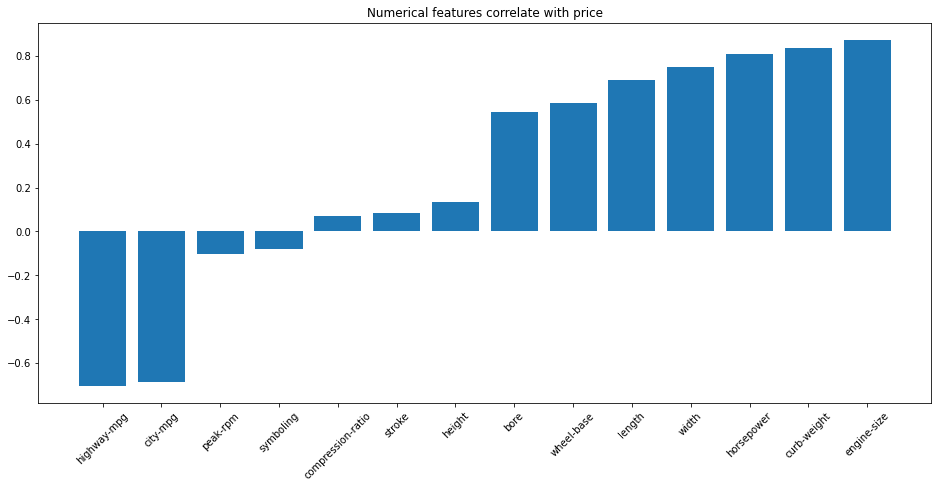

In [27]:
correlation = data2.corr()['price'].sort_values()
plt.figure(figsize=(16,7))
plt.bar(correlation.index[:-1], correlation.values[:-1])
plt.xticks(rotation=45)
plt.title("Numerical features correlate with price")
plt.show()

In [28]:
mask = data2.dtypes == np.object0
categorical_features = data2.columns[mask]
categorical_features

Index(['brand', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-locations', 'engine-type', 'num_of_cylinders',
       'fuel-system'],
      dtype='object')

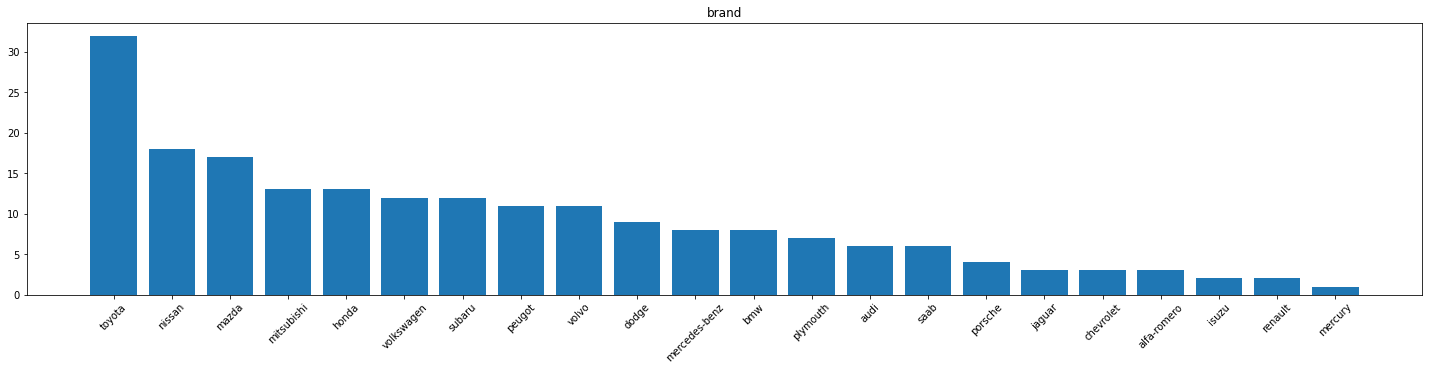

In [29]:
plt.figure(figsize=(25,5))
plt.bar(data2['brand'].value_counts().index, data2['brand'].value_counts())
plt.title('brand')
plt.xticks(rotation=45)

plt.show()

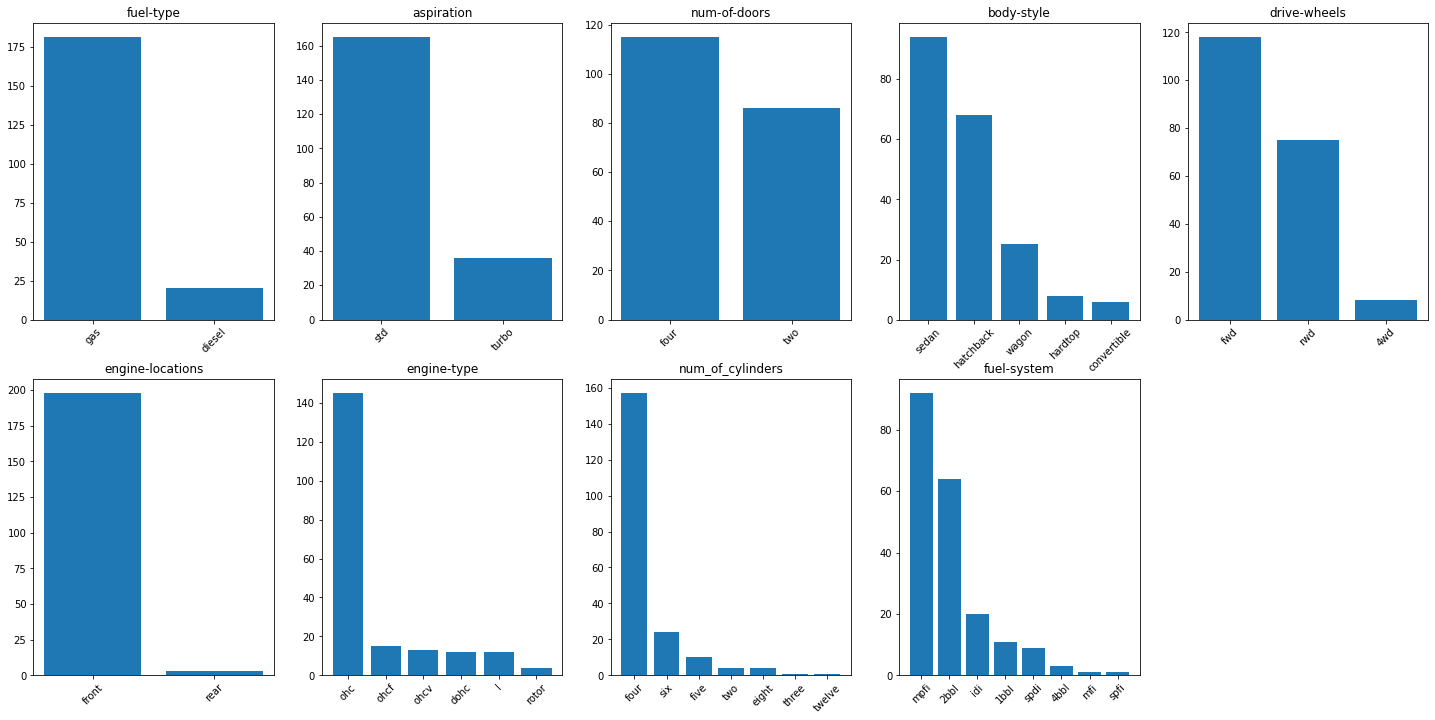

In [30]:
plt.figure(figsize=(25,12))

for i, feat in enumerate(categorical_features[1:]):
    plt.subplot(2,5,i+1)
    plt.bar(data2[feat].value_counts().index, data2[feat].value_counts())
    plt.title(feat)
    plt.xticks(rotation=45)

plt.show()

In [31]:
# most engines are 'ohc' the other types are subsummed under other
data3 = data2.copy()
other_engines = data3['engine-type'].value_counts().index[1:]
data3['engine-type'] = data3['engine-type'].apply(lambda x: 'other' if x in other_engines else x)
data3['engine-type'].value_counts()


ohc      145
other     56
Name: engine-type, dtype: int64

In [32]:
# like with engines fuel-systems are basically of two types, the rest gets subsummed under other
other_fuelsystems = data3['fuel-system'].value_counts().index[2:]
data3['fuel-system'] = data3['fuel-system'].apply(lambda x: 'other' if x in other_fuelsystems else x)
data3['fuel-system'].value_counts()

mpfi     92
2bbl     64
other    45
Name: fuel-system, dtype: int64

In [33]:
# with num-of-cylinders we have a situation similar to fuel-systems and engines but it is reasonable to assume are stronger correlation between cylinder-count and price
# therefore (2,3) -> few, (4) -> normal, (5,6) -> plus, (8,12) -> high
data3['num_of_cylinders'] = data3['num_of_cylinders'].apply(lambda x: 'few' if x in ['two', 'three'] else x)
data3['num_of_cylinders'] = data3['num_of_cylinders'].apply(lambda x: 'normal' if x in ['four'] else x)
data3['num_of_cylinders'] = data3['num_of_cylinders'].apply(lambda x: 'plus' if x in ['five', 'six'] else x)
data3['num_of_cylinders'] = data3['num_of_cylinders'].apply(lambda x: 'high' if x in ['eight', 'twelve'] else x)
data3['num_of_cylinders'].value_counts()

normal    157
plus       34
few         5
high        5
Name: num_of_cylinders, dtype: int64

In [34]:
data4 = pd.get_dummies(data3, drop_first=True)
data4.columns

Index(['symboling', 'wheel-base', 'length', 'width', 'height', 'curb-weight',
       'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg', 'price', 'brand_audi',
       'brand_bmw', 'brand_chevrolet', 'brand_dodge', 'brand_honda',
       'brand_isuzu', 'brand_jaguar', 'brand_mazda', 'brand_mercedes-benz',
       'brand_mercury', 'brand_mitsubishi', 'brand_nissan', 'brand_peugot',
       'brand_plymouth', 'brand_porsche', 'brand_renault', 'brand_saab',
       'brand_subaru', 'brand_toyota', 'brand_volkswagen', 'brand_volvo',
       'fuel-type_gas', 'aspiration_turbo', 'num-of-doors_two',
       'body-style_hardtop', 'body-style_hatchback', 'body-style_sedan',
       'body-style_wagon', 'drive-wheels_fwd', 'drive-wheels_rwd',
       'engine-locations_rear', 'engine-type_other', 'num_of_cylinders_high',
       'num_of_cylinders_normal', 'num_of_cylinders_plus', 'fuel-system_mpfi',
       'fuel-system_other'],
      dtype='object'

In [35]:
data4.head()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,...,body-style_wagon,drive-wheels_fwd,drive-wheels_rwd,engine-locations_rear,engine-type_other,num_of_cylinders_high,num_of_cylinders_normal,num_of_cylinders_plus,fuel-system_mpfi,fuel-system_other
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,1,0,1,0,1,0,1,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,1,0,1,0,1,0,1,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,1,0,1,0,0,1,1,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,1,0,0,0,0,1,0,1,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,1,1,0


In [36]:
mask2 = data2.dtypes != np.object0
numerical_features = data2.columns[mask2]
data4[numerical_features].head()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


## Modelling

### Train-test-split

In [66]:
from sklearn.model_selection import train_test_split

target = "price"
X = data4.drop(target, axis=1)
y = data4[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((140, 51), (140,), (61, 51), (61,))

### basemodel: Basic Linear regression model

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

mse = {"basemodel" : mean_squared_error(y_pred, y_test)}
mse

{'basemodel': 7509415.492298218}

Text(0, 0.5, 'y_true')

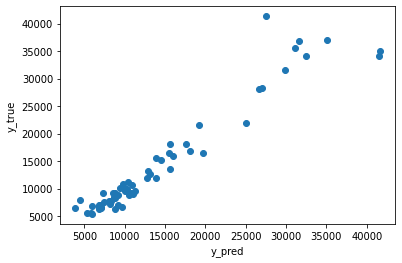

In [39]:
plt.scatter(y_pred, y_test)
plt.xlabel("y_pred")
plt.ylabel("y_true")

### model_1: using standard scaling 

In [40]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
X_train_s = s.fit_transform(X_train)

In [41]:
lr = LinearRegression()
lr.fit(X_train_s, y_train)
X_test_s = s.transform(X_test)
y_pred = lr.predict(X_test_s)

mse['model_1'] = mean_squared_error(y_pred, y_test)
mse

{'basemodel': 7509415.492298218, 'model_1': 7509415.492298198}

Text(0, 0.5, 'y_true')

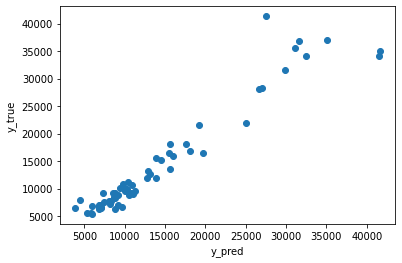

In [42]:
plt.scatter(y_pred, y_test)
plt.xlabel("y_pred")
plt.ylabel("y_true")

### model_2: using Crossvalidation 

one of the problems in the dataset is, that some categorical (onehot encoded) features are quite rare and thus could be lagging in the training set.

ALthough there is no dataset left to test model_2, we can view the result as a best case result for basic linear regression models on our dataset,

In [43]:
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.pipeline import Pipeline

In [44]:
kf = KFold(shuffle=True, random_state= 42, n_splits=len(X)-1)
estimator = Pipeline([('scaler', s), ('regression', lr)])
predictions = cross_val_predict(estimator, X, y, cv=kf)
mse['model_2'] = mean_squared_error(predictions, y)

In [45]:
mse

{'basemodel': 7509415.492298218,
 'model_1': 7509415.492298198,
 'model_2': 5565738.503212997}

Text(0, 0.5, 'y_true')

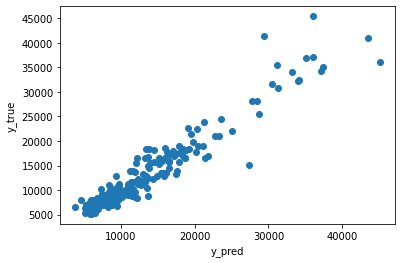

In [46]:
plt.scatter(predictions, y)
plt.xlabel("y_pred")
plt.ylabel("y_true")

### model_3: Lasso with Hyperparameter tuning and crossvalidation


In [47]:
from sklearn.linear_model import Lasso

In [48]:
alphas = np.geomspace(1e-3, 10, num=10)

scores = []

for alpha in alphas:
    las = Lasso(alpha=alpha, max_iter=1e5)

    estimator = Pipeline([
                            ('scaler', s),
                            ('lasso_regression', las)])

    predictions = cross_val_predict(estimator, X, y, cv = len(X)-1)
    score = mean_squared_error(predictions, y)
    scores.append(score)



In [49]:
list(zip(alphas, scores))

[(0.001, 6207642.2491904395),
 (0.0027825594022071257, 6207406.091643566),
 (0.007742636826811269, 6206736.261575144),
 (0.021544346900318832, 6204875.378800262),
 (0.05994842503189409, 6199217.974785933),
 (0.1668100537200059, 6173983.9630574705),
 (0.46415888336127775, 6109110.039723354),
 (1.2915496650148828, 5975853.022095101),
 (3.593813663804626, 5771829.992272455),
 (10.0, 5811526.62628615)]

In [50]:
# there seems to be a alpha minimum between 1 and 10
alphas = np.linspace(1,10, 10)
alphas

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [51]:
scores = []

for alpha in alphas:
    las = Lasso(alpha=alpha, max_iter=1e5)

    estimator = Pipeline([
                            ('scaler', s),
                            ('lasso_regression', las)])

    predictions = cross_val_predict(estimator, X, y, cv = len(X)-1)
    score = mean_squared_error(predictions, y)
    scores.append(score)

In [52]:
list(zip(alphas, scores))

[(1.0, 6018655.3761976855),
 (2.0, 5890435.804074772),
 (3.0, 5813548.186950276),
 (4.0, 5756733.417533741),
 (5.0, 5759624.0380573105),
 (6.0, 5780208.2748085065),
 (7.0, 5809075.723518224),
 (8.0, 5807211.02831544),
 (9.0, 5811776.5956780175),
 (10.0, 5811526.62628615)]

In [98]:
best_estimator = Pipeline([
                            ('scaler', s),
                            ('lasso_regression', Lasso(alpha=4.0, max_iter=1e5))
                        ])
best_estimator.fit(X,y)
mse['model_3'] = mean_squared_error(best_estimator.predict(X), y)

In [56]:
mse

{'basemodel': 7509415.492298218,
 'model_1': 7509415.492298198,
 'model_2': 5565738.503212997,
 'model_3': 2268817.652248045}

### model_4: Ridge regression with Hyperparamter tuning and crossvalidation

In [57]:
from sklearn.linear_model import Ridge

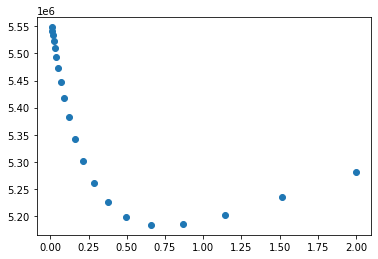

In [76]:
alphas = np.geomspace(0.01,2, 20)
scores=[]

for alpha in alphas:
    estimator = Pipeline([
                        ('scaler', s),
                        ('ridge_regression', Ridge(alpha=alpha))
    ])
    predictions = cross_val_predict(estimator, X, y, cv = len(X)-1)
    score = mean_squared_error(predictions, y)
    scores.append(score)

plt.scatter(alphas, scores)


In [77]:
best_alpha = alphas[np.argmin(np.array(scores))]
best_alpha

0.6555451794530399

In [78]:
best_estimator = Pipeline([
                            ('scaler', s),
                            ('ridge_regression', Ridge(alpha=best_alpha))
                        ])
best_estimator.fit(X,y)
mse['model_4'] = mean_squared_error(best_estimator.predict(X), y)


In [79]:
mse

{'basemodel': 7509415.492298218,
 'model_1': 7509415.492298198,
 'model_2': 5565738.503212997,
 'model_3': 2268817.652248045,
 'model_4': 2298801.694518173}

In [81]:
np.sqrt(mse['model_3'])

1506.2594903428974

In [92]:
models = ['model_1', 'model_2', 'model_3', 'model_4', 'model_5']
results = []
for key in mse.keys():
    results.append(np.sqrt(mse[key]))

Text(0, 0.5, 'Dollar')

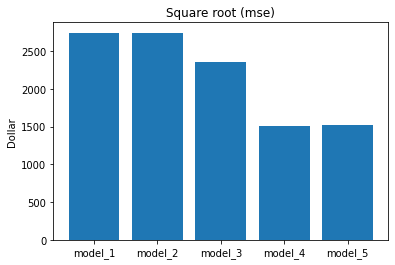

In [96]:
plt.bar(models, results)
plt.title("Square root (mse)")
plt.ylabel("Dollar")

In [97]:
results

[2740.3312741889836,
 2740.33127418898,
 2359.181744421781,
 1506.2594903428974,
 1516.1799677209078]

In [103]:
coeff = np.array(best_estimator.named_steps["lasso_regression"].coef_)
coeff

array([ -231.36209853,  1697.25796378, -1246.23592932,  1049.4058822 ,
        -849.34673307,  3274.92180968,  3437.12016992, -1192.63173842,
          -0.        , -3265.42230575,    15.83623625,   927.48097975,
          -0.        ,   767.72014885,   409.63129422,  1732.89071724,
        -367.08700367,  -826.55781785,  -353.91038274,  -152.27496819,
         -49.80201866,  -169.62994378,   729.41945411,   -70.34931052,
       -1061.17408405,  -451.9972024 ,  -919.82898914,  -736.25621839,
         932.42800208,  -253.10566322,   563.55305672,   -24.46449572,
        -696.29635537,  -129.78477002,    -0.        , -3317.33880541,
         655.24813232,   -59.43050029,  -532.17222138, -1752.01963776,
       -1608.86259113, -1168.63436613,  -288.76257425,    66.84890276,
        1359.89956958,    -0.        ,  -781.96688495, -2076.90649148,
       -2655.33058111,  -567.17128705,  -787.19650501])

In [104]:
feats = data4.drop('price', axis=1).columns

In [111]:

df1 = pd.DataFrame(coeff)
df1['feature'] = pd.DataFrame(feats)

In [115]:
df1

,0,feature
0,-231.362099,symboling
1,1697.257964,wheel-base
2,-1246.235929,length
3,1049.405882,width
4,-849.346733,height
5,3274.921810,curb-weight
6,3437.120170,engine-size
7,-1192.631738,bore
8,-0.000000,stroke
9,-3265.422306,compression-ratio


Text(0.5, 1.0, 'Model 4')

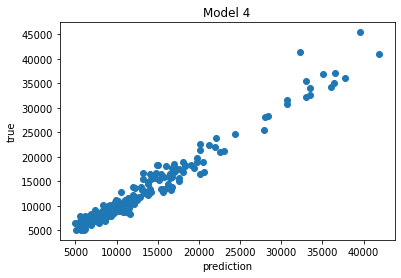

In [117]:
y_pred = best_estimator.predict(X)

plt.scatter(y_pred, y)
plt.xlabel('prediction')
plt.ylabel('true')
plt.title("Model 4")